In [1]:
!sudo pip install alpha_vantage

The directory '/home/du/.cache/pip/http' or its parent directory is not owned by the current user and the cache has been disabled. Please check the permissions and owner of that directory. If executing pip with sudo, you may want sudo's -H flag.
The directory '/home/du/.cache/pip' or its parent directory is not owned by the current user and caching wheels has been disabled. check the permissions and owner of that directory. If executing pip with sudo, you may want sudo's -H flag.
  Running setup.py install for alpha-vantage ... done


In [14]:
from alpha_vantage.timeseries import TimeSeries

ts = TimeSeries(key='KDXMV58WTWWABHKB', output_format='pandas',indexing_type='date')
data, meta_data = ts.get_daily(symbol='VIXY', outputsize='full')
print(data.head())
print(data.tail())

            1. open  2. high   3. low  4. close   5. volume
date                                                       
2020-02-28  20.1000    20.55  18.6500     18.84  21828080.0
2020-02-27  16.9399    18.07  16.5200     18.06  22025868.0
2020-02-26  15.3900    16.13  14.8402     15.54  12361087.0
2020-02-25  14.0001    16.32  13.9200     15.91  15311670.0
2020-02-24  14.1000    14.57  13.4400     14.51  12908486.0
            1. open  2. high  3. low  4. close  5. volume
date                                                     
2011-01-10    79.64    80.87   77.76   77.8800    70182.0
2011-01-07    77.24    80.01   76.18   78.0400    42977.0
2011-01-06    77.44    78.68   76.87   77.8800    83300.0
2011-01-05    80.05    80.10   77.18   77.5499    74240.0
2011-01-04    79.14    81.35   79.14   79.2300   112200.0


In [3]:
print(data.tail())

                     1. open  2. high    3. low  4. close  5. volume
date                                                                
2018-12-19 15:56:00   103.71   103.88  103.6800   103.740   319040.0
2018-12-19 15:57:00   103.75   103.85  103.6200   103.835   328733.0
2018-12-19 15:58:00   103.83   104.29  103.8200   104.210   955988.0
2018-12-19 15:59:00   104.22   104.23  103.9536   104.015   834398.0
2018-12-19 16:00:00   104.00   104.27  103.6600   103.680  1769903.0


In [5]:
data, meta_data = ts.get_daily_adjusted(symbol='BDI', outputsize='compact')
print(data.head())

KeyError: 'Time Series (Daily)'

In [6]:
data, meta_data = ts.get_intraday(symbol='PEJ',interval='5min', outputsize='compact')
print(data.head())
data.shape

                     1. open  2. high   3. low  4. close  5. volume
date                                                               
2018-12-27 10:25:00  38.7185  38.7185  38.7185   38.7185     1258.0
2018-12-27 10:55:00  38.7924  38.7924  38.7513   38.7513      878.0
2018-12-27 11:00:00  38.6979  38.6979  38.6979   38.6979      486.0
2018-12-27 11:20:00  38.6722  38.6722  38.6722   38.6722      944.0
2018-12-27 11:25:00  38.7081  38.7081  38.7081   38.7081      201.0


(100, 5)

Reference at 
https://ntguardian.wordpress.com/2018/07/17/stock-data-analysis-python-v2/

Populating the interactive namespace from numpy and matplotlib


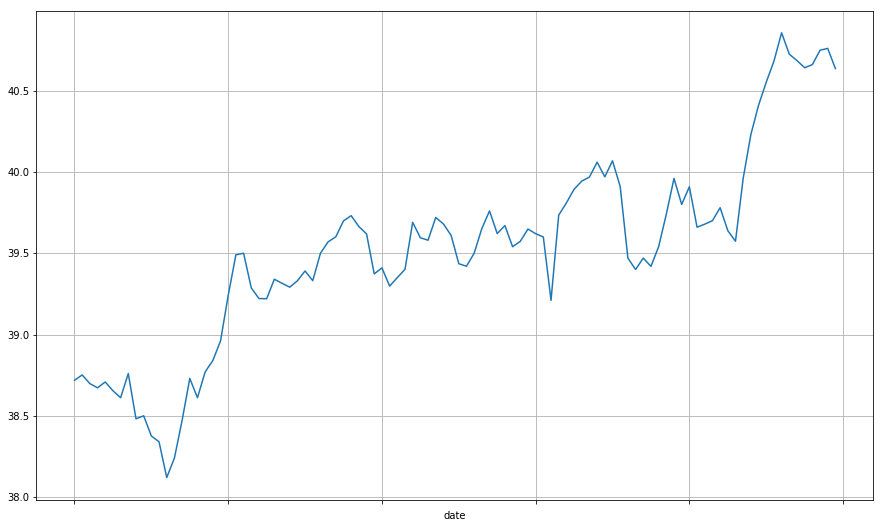

In [7]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt   # Import matplotlib
# This line is necessary for the plot to appear in a Jupyter notebook
%matplotlib inline
# Control the default size of figures in this Jupyter notebook
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)   # Change the size of plots

data.columns=pd.Index(['open','high','low','close','volume'])
#print(data)
data["close"].plot(grid = True) # Plot the adjusted closing price

In [105]:
from matplotlib.dates import DateFormatter, WeekdayLocator,\
    DayLocator, MONDAY
!sudo pip install mpl_finance
from mpl_finance import candlestick_ohlc

The directory '/home/du/.cache/pip/http' or its parent directory is not owned by the current user and the cache has been disabled. Please check the permissions and owner of that directory. If executing pip with sudo, you may want sudo's -H flag.
The directory '/home/du/.cache/pip' or its parent directory is not owned by the current user and caching wheels has been disabled. check the permissions and owner of that directory. If executing pip with sudo, you may want sudo's -H flag.


In [112]:
mondays = WeekdayLocator(MONDAY)
data['week']=pd.to_datetime(data.index).map(lambda x:x.week)
data['day']=pd.to_datetime(data.index).map(lambda x:x.day)
data['year']=pd.to_datetime(data.index).map(lambda x:x.year)
data['month']=pd.to_datetime(data.index).map(lambda x:x.month)
data['weekday']=pd.to_datetime(data.index).map(lambda x:x.weekday) 
# The day of the week represented by the date. Monday == 0 … Sunday == 6



In [113]:
print(data.tail())

                        open   high    low   close     volume  week  day  \
date                                                                       
2018-12-24 12:57:00  94.7300  94.73  94.50  94.620   375620.0    52   24   
2018-12-24 12:58:00  94.6015  94.62  94.43  94.471   232166.0    52   24   
2018-12-24 12:59:00  94.4600  94.59  94.42  94.420   446950.0    52   24   
2018-12-24 13:00:00  94.4200  94.47  94.00  94.040  1110001.0    52   24   
2018-12-24 13:01:00  94.1300  94.13  94.13  94.130  3576304.0    52   24   

                     year  weekday  month  
date                                       
2018-12-24 12:57:00  2018        0     12  
2018-12-24 12:58:00  2018        0     12  
2018-12-24 12:59:00  2018        0     12  
2018-12-24 13:00:00  2018        0     12  
2018-12-24 13:01:00  2018        0     12  


In [116]:
data_=data.groupby('week')
for name, group in data_:
    print(name,group)
# this method can be replaced by df[df['xxxxx']== xxxx]


51                          open      high       low     close      volume  week  \
date                                                                            
2018-12-18 09:31:00  103.7800  104.0800  103.7300  103.8200    798528.0    51   
2018-12-18 09:32:00  103.8202  103.9400  103.7300  103.9200    132410.0    51   
2018-12-18 09:33:00  103.9200  104.0000  103.7400  103.7600    150255.0    51   
2018-12-18 09:34:00  103.8700  103.9200  103.6800  103.7100    149072.0    51   
2018-12-18 09:35:00  103.7700  103.8000  103.5000  103.7350    155960.0    51   
2018-12-18 09:36:00  103.7900  103.8800  103.5400  103.5400     94061.0    51   
2018-12-18 09:37:00  103.5500  103.5900  103.3400  103.4500    128081.0    51   
2018-12-18 09:38:00  103.4150  103.5300  103.4000  103.4000     85774.0    51   
2018-12-18 09:39:00  103.3700  103.3700  102.9500  102.9900    164514.0    51   
2018-12-18 09:40:00  102.9400  103.1000  102.9250  103.0850    144217.0    51   
2018-12-18 09:41:00  103.

python
df.apply(arg) will apply the function arg to each column in df, and return a DataFrame with the result
Recall that lambda x is an anonymous function accepting parameter x; in this case, x will be a pandas Series object
stock_return = stocks.apply(lambda x: x / x[0])
stock_return.head() - 1

In [124]:
import numpy as np 
data['log_change']=data['close'].apply(lambda x:np.log(x)-np.log(x.shift(1)))

AttributeError: 'float' object has no attribute 'shift'

In [127]:
print(data.tail(1))

                      open   high    low  close     volume  week  day  year  \
date                                                                          
2018-12-24 13:01:00  94.13  94.13  94.13  94.13  3576304.0    52   24  2018   

                     weekday  month  
date                                 
2018-12-24 13:01:00        0     12  


In [27]:
from pyti.exponential_moving_average import exponential_moving_average as ema
from pyti.relative_strength_index import relative_strength_index as rsi


def add_indicators(data,ema_period=[5,25],rsi_period=[14],prefix=""):
    result=None
    for period in ema_period:
        r_r = ema(data,period)
        df=pd.DataFrame(r_r, index=data.index,columns=[prefix+"%d"%period+"ema"])
        if result is None:
            result=df
        else:
            result=pd.merge(df, result,
                      how='outer',left_index=True, right_index=True)
    for period in rsi_period:
        r_r = rsi(data,period)
        df=pd.DataFrame(r_r, index=data.index,columns=[prefix+"%d"%period+"rsi"])
        result=pd.merge(df, result,
                      how='outer',left_index=True, right_index=True)
    return result

result=pd.merge(data,add_indicators(data['close']))
print(result)

                         14rsi      25ema       5ema
date                                                
2018-12-27 10:25:00        NaN        NaN        NaN
2018-12-27 10:55:00        NaN        NaN        NaN
2018-12-27 11:00:00        NaN        NaN        NaN
2018-12-27 11:20:00        NaN        NaN        NaN
2018-12-27 11:25:00        NaN        NaN  38.702874
2018-12-27 11:50:00        NaN        NaN  38.683361
2018-12-27 11:55:00        NaN        NaN  38.652148
2018-12-27 12:05:00        NaN        NaN  38.691238
2018-12-27 12:50:00        NaN        NaN  38.611608
2018-12-27 13:15:00        NaN        NaN  38.563885
2018-12-27 13:30:00        NaN        NaN  38.487121
2018-12-27 13:35:00        NaN        NaN  38.424381
2018-12-27 14:20:00        NaN        NaN  38.290567
2018-12-27 14:40:00        NaN        NaN  38.261513
2018-12-27 14:55:00  41.299304        NaN  38.329876
2018-12-27 15:15:00  50.923544        NaN  38.481156
2018-12-27 15:20:00  47.108303        NaN  38.